# Assignment 2
## Roll no. 41313
### Optical Character Recognition
#### Problem Statement
Recognize optical character using ANN

## Handwritten digits MNIST dataset 
Source: Tensorflow / Kaggle

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

## 1. Load MNIST dataset

In [6]:
(train_img, train_label), (test_img, test_label) = mnist.load_data()

Normalize images (0-255 → 0-1)

## 2. Normalise and reshape values

In [8]:
train_img=train_img.reshape(-1, 28, 28, 1)
train_img = train_img / 255.0
test_img=test_img.reshape(-1, 28, 28, 1)
test_img = test_img / 255.0

## 3. Train the Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(28,28,1),  
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()
model.fit(train_img, train_label, epochs=5)
test_loss = model.evaluate(test_img, test_label)

## 4. Evaluate Model Metrics

In [10]:
print(f" Loss\t\t\tAccuracy\n{test_loss}")

 Loss			Accuracy
[0.11084464192390442, 0.9661999940872192]


## 5. Predict Values and Visualise test samples

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


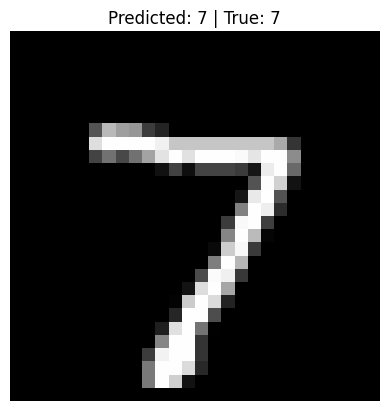

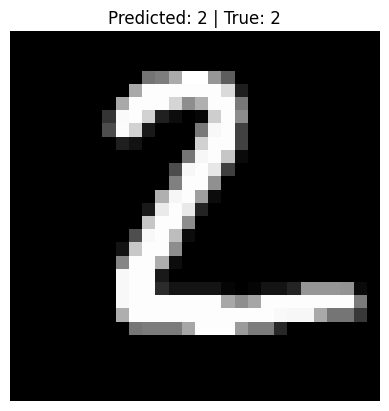

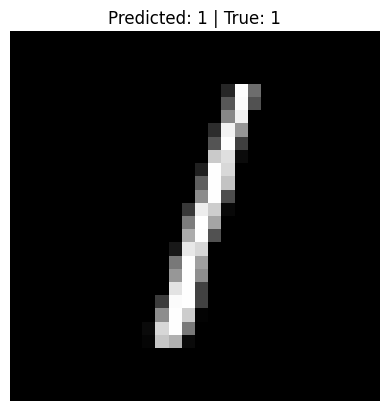

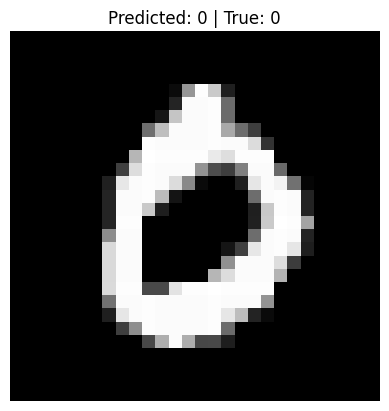

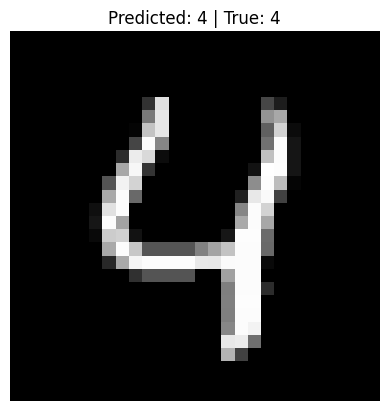

In [18]:
predictions = model.predict(test_img[:5])

for i in range(5):
    plt.imshow(test_img[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {predictions[i].argmax()} | True: {test_label[i]}")
    plt.axis("off")
    plt.show()

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 340,160 (1.30 MB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 226,774 (885.84 KB)